<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Path-Integrals" data-toc-modified-id="Path-Integrals-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Path Integrals</a></span><ul class="toc-item"><li><span><a href="#Free-Particle" data-toc-modified-id="Free-Particle-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Free Particle</a></span></li></ul></li><li><span><a href="#Discretization" data-toc-modified-id="Discretization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Discretization</a></span><ul class="toc-item"><li><span><a href="#Discrete-Unitarity" data-toc-modified-id="Discrete-Unitarity-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Discrete Unitarity</a></span></li><li><span><a href="#Free-Particle-on-a-Periodic-Lattice" data-toc-modified-id="Free-Particle-on-a-Periodic-Lattice-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Free Particle on a Periodic Lattice</a></span></li></ul></li><li><span><a href="#Harmonic-Oscillator" data-toc-modified-id="Harmonic-Oscillator-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Harmonic Oscillator</a></span></li><li><span><a href="#Harmonic-Oscillator" data-toc-modified-id="Harmonic-Oscillator-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Harmonic Oscillator</a></span></li></ul></div>

# Path Integrals

Based on a discussion with Fred Gittes, we compute the propagator for small systems using a path integral.

<!-- END_TEASER -->

In [2]:
import mmf_setup;mmf_setup.nbinit(quiet=True)

<IPython.core.display.Javascript object>

One of Feynman great insights was that the propagator for quantum systems can be constructed through a path integral.  He expressed this by saying that the probability for a particle starting at point and time $(x_i, t_i)$ to be later at a point and time $(x_f, t_f)$ could be obtained by averaging the phases $e^{\I S[x]}$ over all possible trajectories $x(t)$ that the particle might take from $x(t_i) = x_i$ to $x(t_f) = x_f$ where $S[x]$ is the classical action:

$$
  S[x] = \int_{t_i}^{t_f} L(x, \dot{x}, t) \d{t}, \qquad
  L(x, \dot{x}(t), t) = \frac{m \dot{x}^2}{2} - V(x, t),\qquad
  x(t_i) = x_i, \qquad x(t_f) = x_f.
$$

Formally, this can be expressed in terms of a new type of integral:

$$
  \newcommand{\D}[1]{\mathcal{D}[#1]\;}
  U(x_f, t_f;x_i, t_i) 
  = \braket{x_f|\op{U}(t_f,t_i|x_i}
  = \int \D{x}e^{\I S[x]/\hbar},
$$

where $\op{U}(t_f, t_i)$ is the quantum mechanical propagator:

$$
  \ket{\psi(t_f)} = \op{U}(t_f, t_i)\ket{\psi(t_i)}, \qquad
  \op{U}(t_f, t_i) = \mathcal{T}\exp\left(
    \int_{t_i}^{t_f}\frac{\op{H}(t)}{\I\hbar}\d{t}
  \right), \qquad
  \op{H} = \frac{\op{P}^2}{2m} + V(\op{X}, t).
$$

In the expression for $\op{U}(t_f, t_i)$, the integral must be time-ordered as signified by the operator $\mathcal{T}$ which means that in every term, operators must appear in descending time order.  Formally this can be understood by Taylor expanding the exponential and then manually rearranging all terms so that they are in the correct order.

For example, expanding only to quadratic order, we would have:

$$
  \op{U}(t_f, t_i) = \mat{1} 
  +
  \int_{t_i}^{t_f}\frac{\op{H}(t)}{\I\hbar}\d{t}
  +
  \frac{1}{2!}
  \mathcal{T}\left(
    \int_{t_i}^{t_f}\frac{\op{H}(t)}{\I\hbar}\d{t}
  \right)^2
  +
  \cdots =\\
  \mathcal{T}\left(
    \int_{t_i}^{t_f}\frac{\op{H}(t)}{\I\hbar}\d{t}
  \right)^2
  =
  \frac{1}{(\I\hbar)^{2}}
  \int_{t_i}^{t_f}\d{t_1}
  \int_{t_i}^{t_f}\d{t_2}\;
  \mathcal{T}
  \op{H}(t_1)
  \op{H}(t_2)
  =\\
  =
  \frac{1}{(\I\hbar)^{2}}
  \int_{t_i}^{t_f}\d{t_1}
  \int_{t_i}^{t_f}\d{t_2}\;
  \begin{cases}
      \op{H}(t_1)\op{H}(t_2) & t_2\leq t_1\\
      \op{H}(t_2)\op{H}(t_1) & t_1<t_2
  \end{cases}=\\
  =
  \frac{1}{(\I\hbar)^{2}}
  \int_{t_i}^{t_f}\d{t_1}
  \left[
      \int_{t_i}^{t_1}\d{t_2}\;
      \op{H}(t_1)\op{H}(t_2)
      +
      \int_{t_1}^{t_f}\d{t_2}\;
      \op{H}(t_2)\op{H}(t_1)
  \right].
$$

*Of course, if the Hamiltonian commutes at different times $[\op{H}(t_1), \op{H}(t_2)] = 0$ – for example, if $V(\op{X}, t) = (\op{X})$ is time independent – then there is no need to worry about the time-ordering and one can simply ignore this complication.*



Consider the path integral representation of the propagator corresponding to a time-independent Hamiltonian:

$$
  \newcommand{\D}[1]{\mathcal{D}[#1]\;}
  U(x_N, T;x_0, 0) = \int \D{x}e^{\I S/\hbar}, \qquad
  S = \int_{0}^{T}\d{t} L[x(t), \dot{x}(t)], \qquad
  L[x, \dot{x}] = \frac{m}{2}\dot{x}^2 - V(x), \qquad
  H[x, p] = \frac{p^2}{2m} + V(x).
$$

Discretizing in time we have

$$
  S_N = \sum_{i=0}^{N-1} \d{t}\;\left[
    \frac{m}{2}\left(\frac{x_{i+1}-x_{i}}{\d{t}}\right)^2
    - \frac{V(x_{i}) + V(x_{i+1})}{2}
  \right], \qquad
  \d{t} = \frac{T}{N}.\\
  U(x_N, T;x_0, 0) = \lim_{N\rightarrow \infty} A^N \int\d{x_1}\int\d{x_2}\cdots\int\d{x_{N-1}}
  \exp\left\{
    \frac{\I}{\hbar}\sum_{i=0}^{N-1}\d{t}
    \left[
      \frac{m}{2}\frac{(x_{i+1}-x_{i})^2}{\d{t}^2}
      - 
      \frac{V(x_{i}) + V(x_{i+1})}{2}
    \right]
  \right\}
    = \\
    = \lim_{N\rightarrow \infty} A^N \int\d{x_1}\int\d{x_2}\cdots\int\d{x_{N-1}}
    \prod_{i=0}^{N-1}
  \exp\left\{
    \frac{\I}{\hbar}
    \left[
      \frac{m}{2}\frac{(x_{i+1}-x_{i})^2}{\d{t}}
      - 
      \frac{V(x_{i}) + V(x_{i+1})}{2}\d{t}
    \right]
  \right\} 
    = \\
    = \lim_{N\rightarrow \infty} A^N
    \int\d{x_1}\int\d{x_2}\cdots\int\d{x_{N-1}}
    M_{x_Nx_{N-1}}M_{x_{N-1}x_{N-1}}\cdots M_{x_2x_1}M_{x_1x_0}
    = \lim_{N\rightarrow \infty} (A \mat{M})^{N}, \\
    M_{xy} = \exp\left\{
      \frac{\I}{\hbar}
      \left[
        \frac{m}{2}\frac{(x-y)^2}{\d{t}}
        - 
        \frac{V(x) + V(y)}{2}\d{t}
      \right]
    \right\}.  
$$

The matrices $A\mat{M}$ are unitary $\abs{A}^2\mat{M}^\dagger\cdot\mat{M} = \mat{1}$ if properly normalized:

$$
  [\mat{M}^\dagger\cdot\mat{M}]_{xy} = \int\d{z}\; M^*_{zx}M_{zy}
  = \int \d{z}
    \exp\left\{
      \frac{\I}{\hbar}
      \left[
        \frac{m}{2}\frac{(z-y)^2 - (z-x)^2}{\d{t}}
        + 
        \frac{V(x) - V(y)}{2}\d{t}
      \right]
    \right\}=\\
  = \exp\left\{
      \frac{\I}{\hbar}
      \left[
        \frac{m}{2}\frac{y^2 - x^2}{\d{t}}
        + 
        \frac{V(x) - V(y)}{2}\d{t}
      \right]
    \right\}
  \int \d{z}
    \exp\left\{
      \frac{\I}{\hbar}
      \left[
        \frac{m}{2}\frac{2z(x-y)}{\d{t}}
      \right]
    \right\}=\\
  =
  \frac{2\pi\hbar\d{t}}{m}
  \delta(x-y).
$$

Hence (the factor of $\I$ included in $A$ will help later):

$$
  A = \sqrt{\frac{m}{2\pi \I\hbar\d{t}}}, \qquad
  AM_{xy} = \sqrt{\frac{m}{2\pi \I\hbar\d{t}}}\exp\left\{
      \frac{\I}{\hbar}
      \left[
        \frac{m}{2}\frac{(x-y)^2}{\d{t}}
        - 
        \frac{V(x) + V(y)}{2}\d{t}
      \right]
    \right\}.  
$$

## Free Particle

If we neglect the potential $V=0$, then we can explicitly perform the matrix multiplication, completing the square in $z$ and absorbing the integrating factor into $A$:

$$
  [(A\mat{M})^2]_{xy} = \frac{m}{2\pi \I\hbar\d{t}}\int \d{z}\; 
  \exp\left\{\frac{\I}{\hbar}\frac{m}{2}\frac{(x-z)^2 + (z-y)^2}{\d{t}}\right\}
   =\\
   =\exp\left\{\frac{\I}{2\hbar}\frac{m}{2}\frac{(x-y)^2}{\d{t}}\right\}
  \frac{m}{2\pi \I\hbar\d{t}}\int \d{z}\;
  \exp\left\{\frac{m\I}{\hbar}\frac{z^2}{\d{t}}\right\}
   =
  \sqrt{\frac{m}{2\pi \I\hbar 2\d{t}}}
  \exp\left\{\frac{\I}{2\hbar}\frac{m}{2}\frac{(x-y)^2}{\d{t}}\right\}
$$

Note: the integral over $z$ is a little dubious since the factor of $\I$ makes it non-convergent.

Likewise:

$$
  [(A\mat{M})^N]_{xy} 
  =
  \sqrt{\frac{m}{2\pi \I\hbar N\d{t}}}
  \exp\left\{\frac{\I}{N\hbar}\frac{m}{2}\frac{(x-y)^2}{\d{t}}\right\}
  = 
  \sqrt{\frac{m}{2\pi \I\hbar T}}
  \exp\left\{\frac{\I}{\hbar}\frac{m}{2}\frac{(x-y)^2}{T}\right\}.
$$

Hence (including the normalization factor),

$$
  U(y,T;x, 0) = \sqrt{\frac{m}{2\pi \hbar \I T}}\exp\left\{\frac{\I m (y-x)^2}{2\hbar T}\right\}.
$$

# Discretization

To make the path integral concrete (and well defined) we can express it in terms of a discrete lattice in space and time.  A useful approach is to use periodic functions on a lattice of $N_x$ points in a box of length $L$.  With this discretization both the positions $x=x_n$ and wave-numbers $k = p/\hbar = k_n$ become discrete with $n$ running over a finite range $n \in \{0, 1, 2\cdots N-1\}$.

$$
  x_n = n\d{x} = n\frac{L}{N_x}, \qquad
  k_n = \frac{2\pi n}{L},
  \qquad n\in\{-N/2, -N/2+1, \dots N/2-1\}
$$

Two sets of normalizations are useful and follow from the following lattice relationship

$$
  \sum_{l}e^{\I k_l(x_m - x_n)} = \sum_{l}e^{\I 2\pi l(m - n)/N} = N\delta_{nm}, \\
  \frac{1}{L}\sum_{l}e^{\I k_l(x_m - x_n)} = \frac{\delta_{nm}}{\d{x}}, \qquad
  \d{x}\sum_{l}e^{\I k_l(x_m - x_n)} = L\delta_{nm}.
$$

**Physical**:

$$
  \braket{x_m|k_n} = e^{\I k_n x_m}, \qquad
  \braket{x_m|x_n} = \frac{\delta_{nm}}{\d{x}}, \qquad
  \braket{k_m|k_n} = L\delta_{nm},\\
  \mat{1} = \d{x}\sum_{n}\ket{x_n}\bra{x_n} = \frac{1}{L}\sum_{m}\ket{k_n}\bra{k_n}.
$$

In this normalization, continuum equations can be directly translated by replacing integrals as follows:

$$
  \int \d{x} \rightarrow \d{x}\sum_{n}, \qquad
  \int \frac{\d{k}}{(2\pi)} \rightarrow \frac{1}{L}\sum_{n}.
$$

**Numerical**:

The **Numerical** normalization is obtained from the **Physical** normalization by rescaling:

$$
  \ket{x_n} \rightarrow \frac{\ket{x_n}}{\sqrt{\d{x}}}, \qquad
  \ket{k_n} \rightarrow \sqrt{L}\ket{k_n}\\
  \braket{x_m|k_n} = \sqrt{\frac{\d{x}}{L}} e^{\I k_n x_m} 
                   = \frac{1}{\sqrt{N_x}}e^{\I k_n x_m}, \qquad
  \braket{x_m|x_n} = \braket{k_m|k_n} = \delta_{nm},\\
  \mat{1} = \sum_{n}\ket{x_n}\bra{x_n} = \sum_{m}\ket{k_n}\bra{k_n}.
$$

In this normalization $\braket{x_m|k_n}$ is unitary.



## Discrete Unitarity

Fred Gittes points out that in discrete form, there is a special relationship between $\d{t}$ and $\d{x}$ such that $\mat{M}^\dagger\cdot\mat{M}$ is unitary:

$$
  [(A\mat{M})^\dagger \cdot (A\mat{M})]_{xy} = 
  \sum_{q} (AM)_{qx}^*(AM)_{qy}
  =
  \abs{A}^2
  \sum_{l=0}^{N_x-1}
  \exp\left\{
    \frac{m\I}{2\hbar\d{t}}
    [(x_l-y)^2 - (x-x_l)^2]
    -\frac{\I}{\hbar}\frac{V(y)-V(x)}{2}\d{t}
  \right\}\\
  =
  \frac{m}{2\pi\hbar\d{t}}
  \exp\left\{
    \frac{m\I}{2\hbar\d{t}}(y^2-x^2)
    -\frac{\I}{\hbar}\frac{V(y)-V(x)}{2}\d{t}
  \right\}
  \sum_{l=0}^{N_x-1}
  \exp\left\{
    \frac{m\I}{2\hbar\d{t}}[2x_l(x-y)]
  \right\}
  =
  N_x\delta_{xy}
$$

where the last relationship is true for the lattice iff:

$$
  \frac{m}{\hbar\d{t}}\d{x}^2 = \frac{2\pi n}{N_x}, \qquad
  \d{t} = \frac{m L\d{x}}{2\pi n\hbar}.
$$

*To see this, note that with the special $\d{t}$, the last sum is $N_x\delta_{xy}$.  This leaves the first factor, whose exponent vanishes when $x=y$ leaving a factor of unity.*

The discrete matrix $\mat{M}$ is thus unitary with this special value of $\d{t}$ if the normalization factor of $A = 1/N_x$ at this special value.  As we shall see below,

$$
  A = \sqrt{\frac{m}{2\pi \I\hbar\d{t}}}
  \\
$$

Using the numerical basis, we can diagonalize $M_{xy}$.
$$
  \tilde{M}_{mn} = \sum_{mn}\braket{k_m|x}M_{xy}\braket{y|k_n} 
  = 
  \frac{1}{N_x}
  \sum_{xy}
  \exp\left\{
      -\I (k_mx - k_ny)
      +
      \frac{\I}{\hbar}
      \Bigl[
        \frac{m}{2}\frac{(\overbrace{x-y}^{q})^2}{\d{t}}
      \Bigr]
    \right\} = \\
  = 
  \frac{1}{N_x}
  \sum_{qy}
  e^{\I(k_n-k_m)y}
  \exp\left\{
      -\I k_m q
      +
      \frac{\I}{\hbar}
      \left[
        \frac{m}{2}\frac{q^2}{\d{t}}
      \right]
    \right\}
  = 
  \delta_{mn}
  \sum_{q}
  \exp\left\{
      \frac{\I}{\hbar}
      \left[
        \frac{m}{2}\frac{q^2}{\d{t}}
      \right]
      - \I q k_n
    \right\}.
$$

## Free Particle on a Periodic Lattice

The last sum can be simplified if we can shift $q \rightarrow q + l\d{x}$ to complete the square which requires

$$
  l = \frac{\hbar k_n}{m}\frac{\d{t}}{\d{x}}
$$

to be an integer.  This is the case if $\d{t}$ is chosen in terms of an integer $j$:

$$
  \d{t} = j\frac{m L\d{x}}{2\pi \hbar}, \qquad
  l = jn.
$$

If this is true, then we can do this shift and we have:

$$
  \tilde{M}_{mn} = \delta_{mn}
  \exp\left\{
    \frac{\I m l^2 \d{x}^2}{2\hbar \d{t}}
  \right\}
  \sum_{q}
  \exp\left\{
    \frac{\I m q^2}{2\hbar \d{t}}
  \right\}
  =
  \delta_{mn}
  \exp\left\{
    \frac{\I}{\hbar} \frac{\hbar^2 k_n^2}{2m} \d{t}
  \right\}
  \sum_{q}
  \exp\left\{
    \frac{\I m q^2}{2\hbar \d{t}}
  \right\}
$$

# Harmonic Oscillator

In [8]:
%pylab inline --no-import-all

Nx = 62
L = 10.0
w = m = h = 1.0
dx = L/Nx
x = np.arange(Nx)*dx - L/2

n_t = 0
Nt = 2*n_t+1
dt = m*L*dx/2/np.pi/Nt/h
T = Nt*dt

def V(x):
    return m*(w*x)**2/2.0

x_ = x[:,None]
y_ = x[None,:]

A = np.sqrt(m/2/np.pi/h/T)
AM = dx*np.exp(1j/h*(m*(x_-y_)**2/2.0/dt - dt*(V(x_) + V(y_))/2))*A
I = AM.conj().T.dot(AM)
assert np.allclose(np.eye(Nx), I)

Populating the interactive namespace from numpy and matplotlib


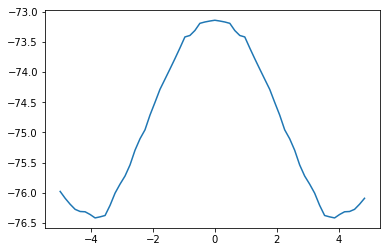

In [9]:
import scipy as sp
import scipy.linalg
H = 1j*h*sp.linalg.logm(AM)/dt
assert np.allclose(H, H.T.conj())
assert np.allclose(H.imag, 0)
H = H.real
plt.plot(x, np.diag(H))

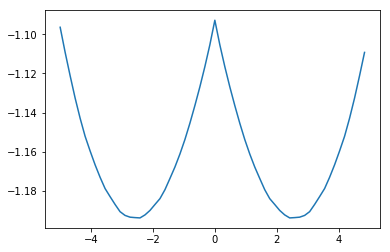

In [10]:
import scipy as sp
import scipy.linalg
U = np.linalg.matrix_power(AM, Nt)
H = 1j*h*sp.linalg.logm(U)/T
assert np.allclose(H, H.T.conj())
#assert np.allclose(H.imag, 0)
#H = H.real
plt.plot(x, np.diag(H))

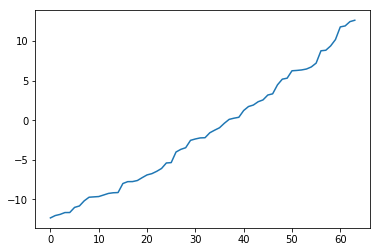

In [42]:
plt.plot(np.linalg.eigvalsh(H))

In [6]:
U = np.linalg.matrix_power(M, 2)
(U.conj().T.dot(U))

array([[ 1.00000000e+00+0.00000000e+00j, -9.88415498e-15-7.49400542e-17j,
        -1.11022302e-16+6.38378239e-16j, -8.19939154e-15+4.76210391e-18j],
       [-9.88415498e-15+7.49400542e-17j,  1.00000000e+00+0.00000000e+00j,
        -8.04951143e-15+4.76210391e-18j, -1.11022302e-16-6.38378239e-16j],
       [-1.11022302e-16-6.38378239e-16j, -8.04951143e-15-4.76210391e-18j,
         1.00000000e+00+0.00000000e+00j, -9.89367919e-15+7.49400542e-17j],
       [-8.19939154e-15-4.76210391e-18j, -1.11022302e-16+6.38378239e-16j,
        -9.89367919e-15-7.49400542e-17j,  1.00000000e+00+0.00000000e+00j]])

In [59]:
M

array([[ 0.35355339-3.53553391e-01j,  0.5       +1.53869061e-15j,
        -0.35355339+3.53553391e-01j,  0.5       +1.88411095e-16j],
       [ 0.5       +1.53869061e-15j,  0.35355339-3.53553391e-01j,
         0.5       +1.53869061e-15j, -0.35355339+3.53553391e-01j],
       [-0.35355339+3.53553391e-01j,  0.5       +1.53869061e-15j,
         0.35355339-3.53553391e-01j,  0.5       +1.53869061e-15j],
       [ 0.5       +1.88411095e-16j, -0.35355339+3.53553391e-01j,
         0.5       +1.53869061e-15j,  0.35355339-3.53553391e-01j]])

# Harmonic Oscillator

In [8]:
%pylab inline --no-import-all

Nx = 64
L = 10.0
w = m = h = 1.0
dx = L/Nx
x = np.arange(Nx)*dx - L/2

n_t = 20
Nt = 2*n_t+1
dt = m*L*dx/2/np.pi/Nt/h
T = Nt*dt

def V(x):
    return m*(w*x)**2/2.0

x_ = x[:,None]
y_ = x[None,:]

B = np.sqrt(2j*Nt*np.pi*h*dt/m)
M = dx*np.exp(1j/h*(m*(x_-y_)**2/2.0/dt - V(x_+y_)))/B
I = M.conj().T.dot(M)

Populating the interactive namespace from numpy and matplotlib


AssertionError: 